In [31]:
# import packeages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
pd.set_option('display.max_columns', None)     # Show all columns




In [32]:
 # import clean data
Eda_data = pd.read_csv(r"C:\Users\User\Desktop\speed dating\cleaned_speeddating.csv")

In [33]:
# begin eda goal figure out the statistical features of the data
Eda_data.describe()

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,match
count,8261.000000,8195.000000,8293.000000,8293.000000,8293.000000,8210.000000,8210.000000,8210.000000,8201.000000,8192.000000,8170.000000,8094.00000,8022.000000,8002.000000,7948.000000,7588.000000,7235.000000,8293.000000,8293.000000,8293.000000,8283.000000,8273.000000,8251.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8104.000000,8030.000000,8011.000000,7957.000000,7596.000000,7240.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8220.000000,8271.000000,7130.000000,8067.000000,7999.000000,7933.000000,8293.000000
mean,26.361336,26.359243,0.398649,3.784758,3.652357,22.469339,17.397491,20.280572,17.445287,10.697893,11.853002,6.18321,7.173897,7.368658,6.396829,6.776687,5.467657,22.509819,17.397520,20.268819,17.455201,10.680254,11.845241,7.085158,8.295875,7.704609,8.404137,7.578202,6.192053,7.175031,7.367807,6.400842,6.778699,5.475207,6.424093,4.574460,6.245629,7.785241,6.986977,6.716026,5.737369,3.880140,5.745930,7.679006,5.303630,6.777764,7.919450,6.825877,7.851320,5.632702,4.340408,0.196010,5.534639,3.207756,6.137003,5.206963,0.049666,0.164597
std,3.570128,3.560358,0.489650,2.846041,2.805539,12.565361,7.017518,6.784034,6.076928,6.094734,6.357397,1.95101,1.743151,1.551816,1.955057,1.794976,2.154938,12.585107,7.047662,6.781556,6.085570,6.106650,6.363672,1.395963,1.407452,1.564743,1.076596,1.778647,1.949506,1.741436,1.549073,1.950856,1.794109,2.152986,2.619168,2.801119,2.419187,1.754483,2.052101,2.263200,2.570708,2.621087,2.502668,2.006968,2.529552,2.234812,1.701288,2.156575,1.792198,2.609105,2.717660,0.303539,1.733580,2.451451,1.836603,2.128723,0.282368,0.370838
min,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,24.000000,0.000000,1.000000,1.000000,15.000000,15.000000,17.500000,15.000000,5.000000,9.520000,5.00000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,26.000000,26.000000,0.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.00000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.0000

In [34]:
def is_range_format(s):
    return isinstance(s, str) and bool(re.fullmatch(r"\[\d+-\d+\]", s))

columns_to_drop = []

for col in Eda_data.columns:
    sample = Eda_data[col].dropna().astype(str)
    match_ratio = sample.apply(is_range_format).mean()  # now a float between 0 and 1
    if match_ratio > 0.8:  # Drop if >80% of values match the pattern
        columns_to_drop.append(col)

Eda_data.drop(columns=columns_to_drop, inplace=True)

In [35]:
Eda_data.head()


,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,match
0,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0,0.0,0
1,female,21.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0,1.0,0
2,female,21.0,22.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,Law,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,4.0,7.0,NaN,1.0,1
3,female,21.0,23.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,4.0,7.0,6.0,0.0,1
4,female,21.0,24.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,Law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,6.0,0.0,1


In [36]:
# do an outlier analysis using iqr
# 1. Isolate only numeric columns (drops any object/string columns)
numeric_df = Eda_data.select_dtypes(include=[np.number])

# 2. Compute IQR along each column (axis=0) or on the flattened array (axis=None)
iqr_values = stats.iqr(numeric_df, axis=0, rng=(25,75), scale=1.0,
                       nan_policy='omit', interpolation='linear')

print("IQR for each column:")
for col, val in zip(numeric_df.columns, iqr_values):
    print(f"  {col}: {val}")

IQR for each column:
  age: 4.0
  age_o: 4.0
  samerace: 1.0
  importance_same_race: 5.0
  importance_same_religion: 5.0
  pref_o_attractive: 10.0
  pref_o_sincere: 5.0
  pref_o_intelligence: 6.309999999999999
  pref_o_funny: 5.0
  pref_o_ambitious: 10.0
  pref_o_shared_interests: 6.48
  attractive_o: 3.0
  sinsere_o: 2.0
  intelligence_o: 2.0
  funny_o: 3.0
  ambitous_o: 2.0
  shared_interests_o: 3.0
  attractive_important: 10.0
  sincere_important: 5.0
  intellicence_important: 6.419999999999998
  funny_important: 5.0
  ambtition_important: 10.0
  shared_interests_important: 6.48
  attractive: 2.0
  sincere: 1.0
  intelligence: 2.0
  funny: 1.0
  ambition: 2.0
  attractive_partner: 3.0
  sincere_partner: 2.0
  intelligence_partner: 2.0
  funny_partner: 3.0
  ambition_partner: 2.0
  shared_interests_partner: 3.0
  sports: 5.0
  tvsports: 5.0
  exercise: 3.0
  dining: 2.0
  museums: 3.0
  art: 3.0
  hiking: 4.0
  gaming: 4.0
  clubbing: 4.0
  reading: 2.0
  tv: 4.0
  theater: 4.0
  mov

Missing columns: set()


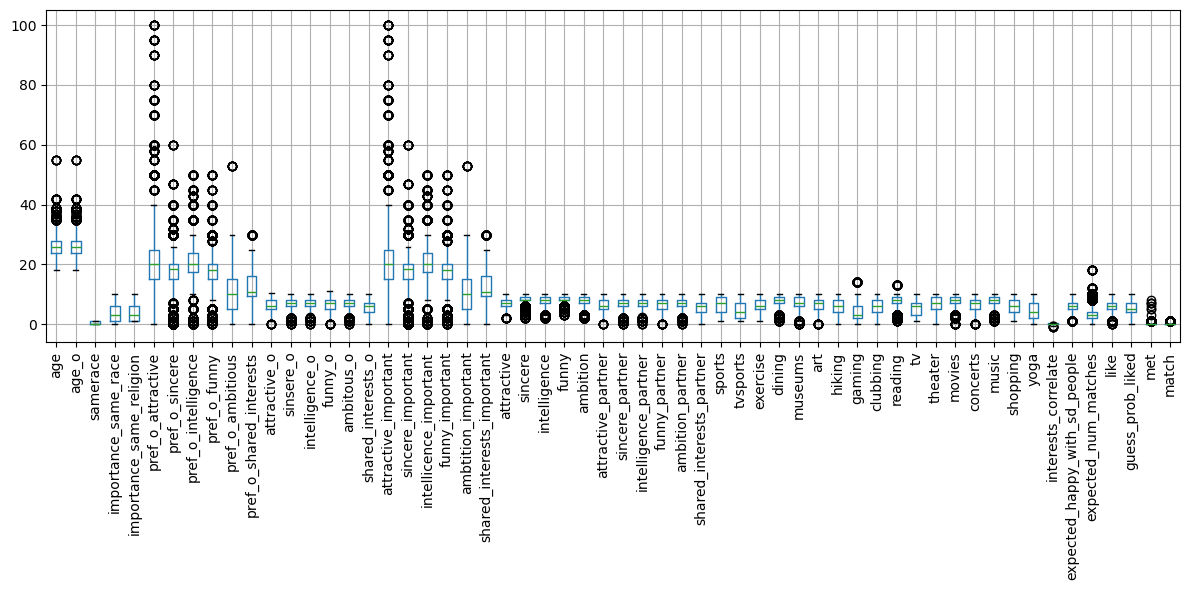

In [37]:
# lets make a box plot to visualize this
# 1) Pull out exactly the numeric columns from your original df:
numeric_cols = Eda_data.select_dtypes(include=[np.number]).columns.tolist()

# 2) Double-check that list actually exists in your DataFrame:
print("Missing columns:", set(numeric_cols) - set(Eda_data.columns))

# 3) Slice the DataFrame *first*, then call boxplot (no ambiguity):
subset = Eda_data[numeric_cols]

plt.figure(figsize=(12,6))
subset.boxplot()        # this will plot one box per numeric column
plt.xticks(rotation=90) # rotate x-labels if you have lots of vars
plt.tight_layout()
plt.show()
# from analysing th box plot columns we can see that atractive ness is a really important feature when it comes to dating 


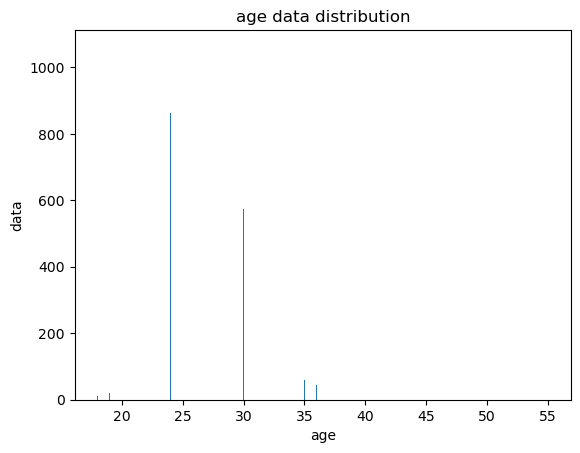

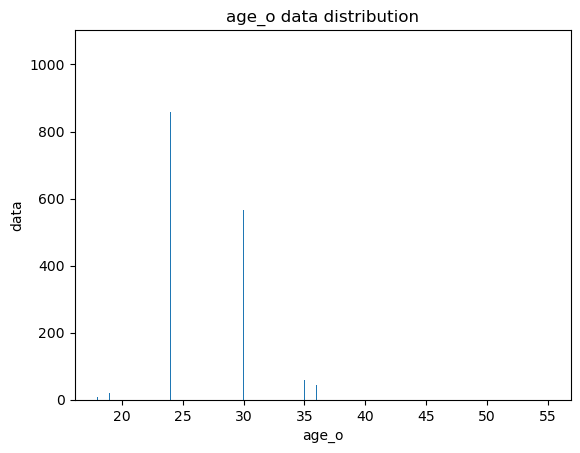

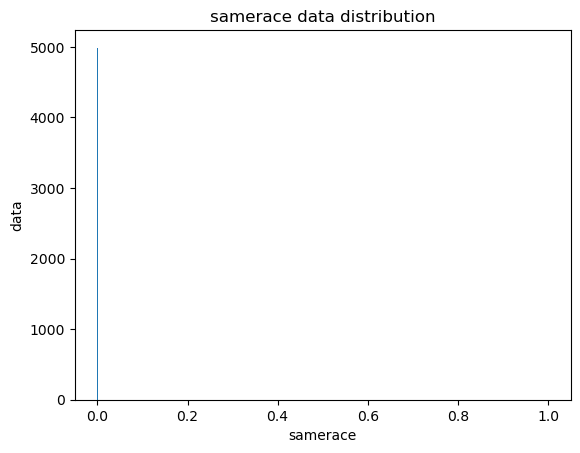

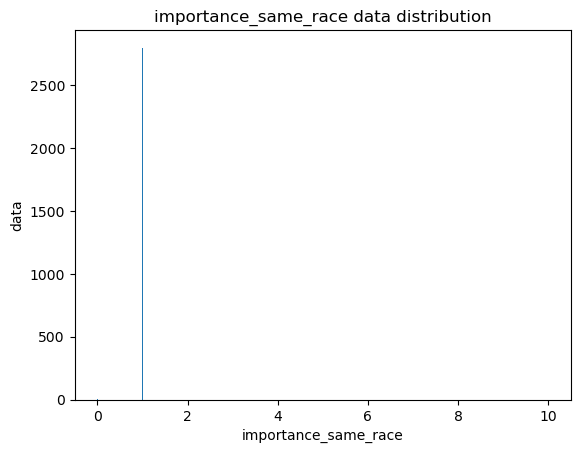

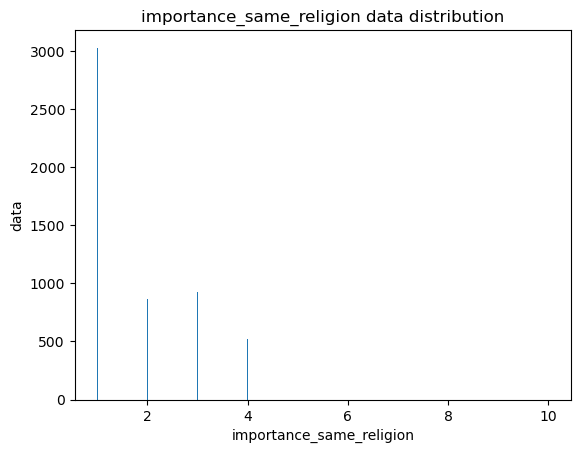

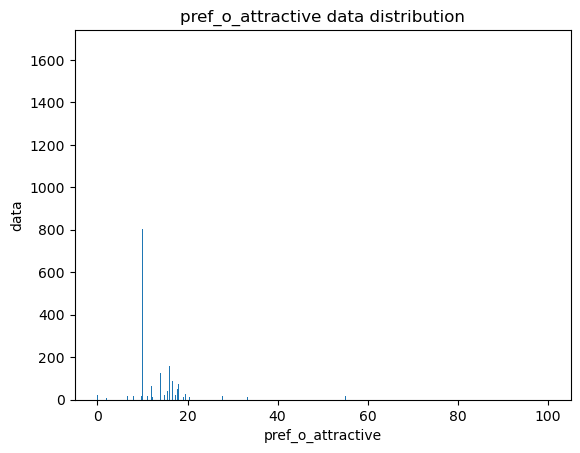

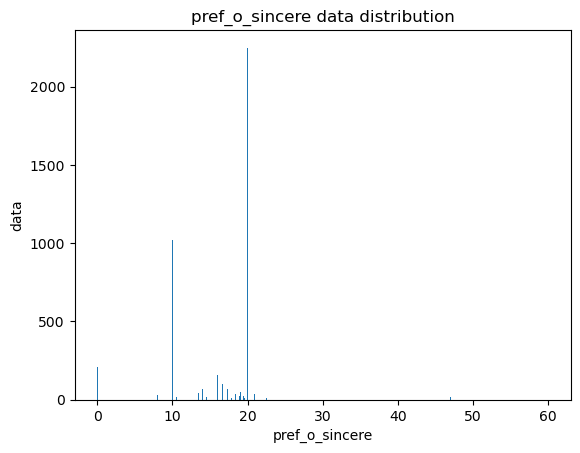

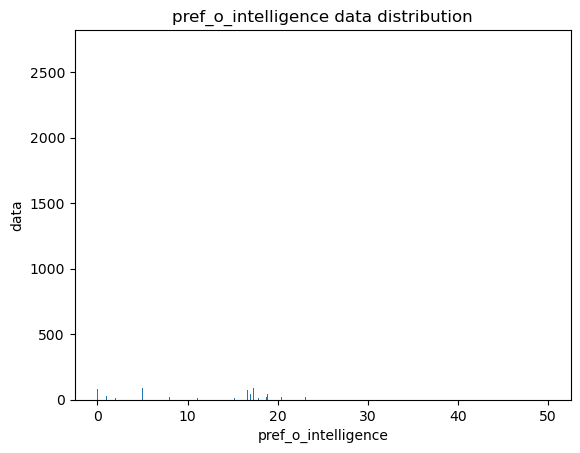

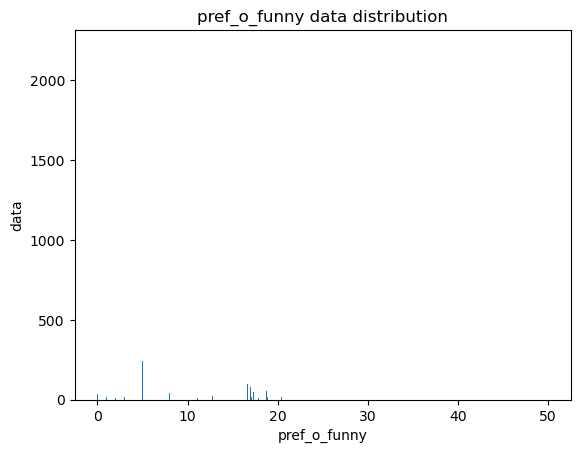

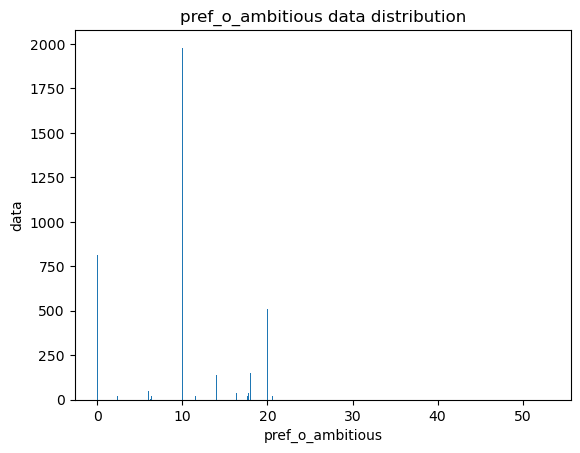

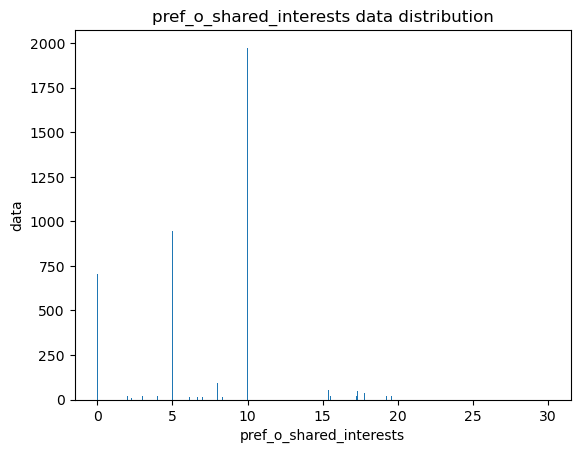

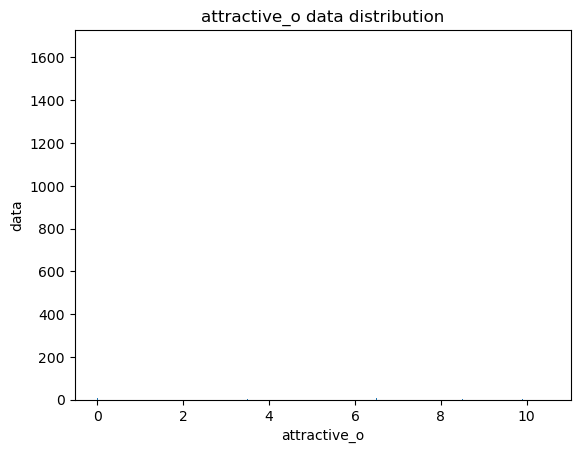

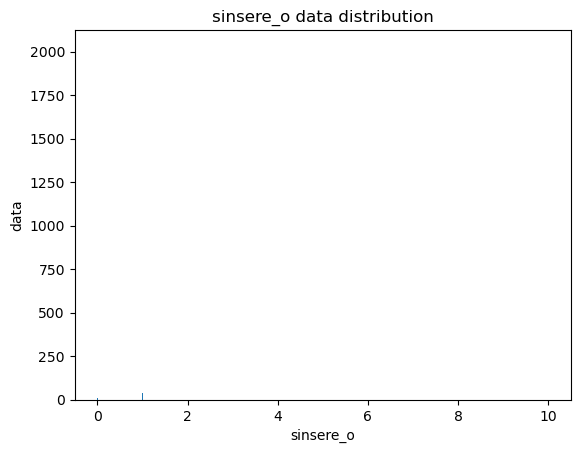

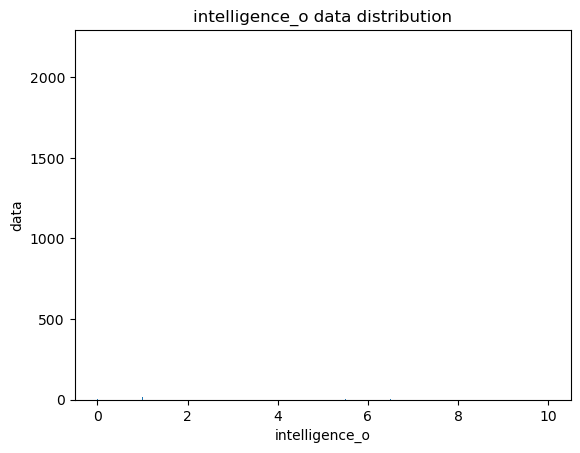

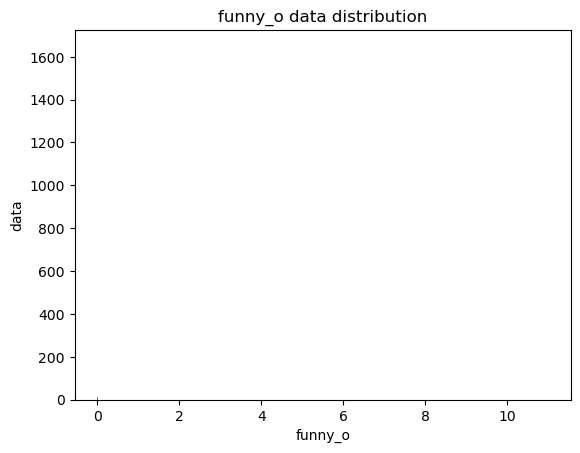

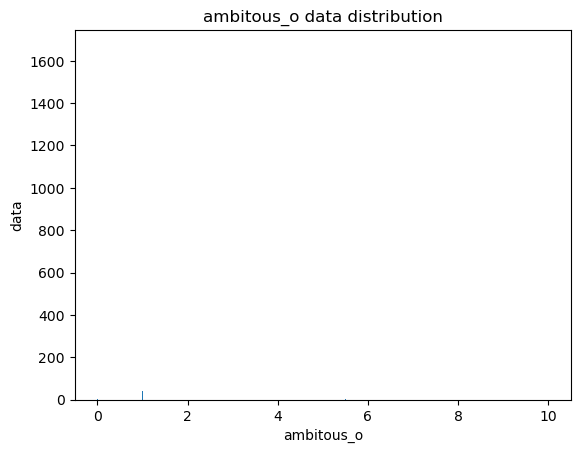

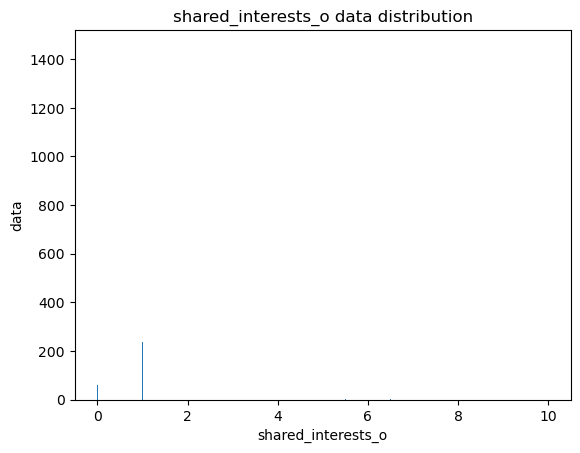

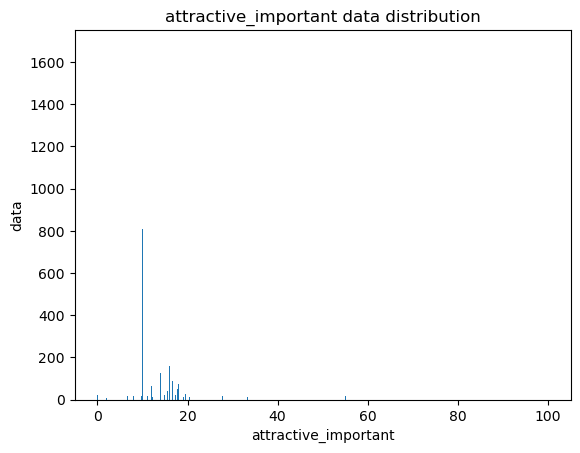

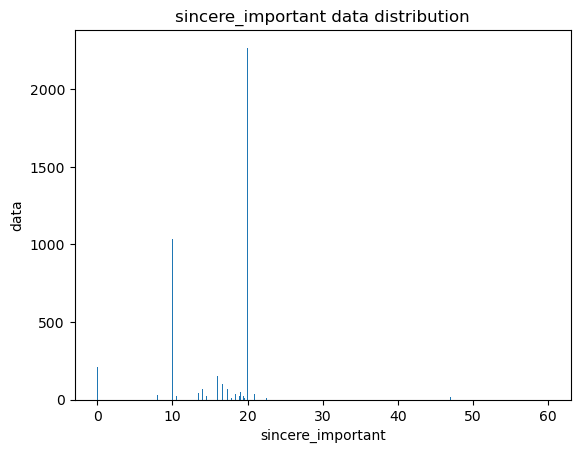

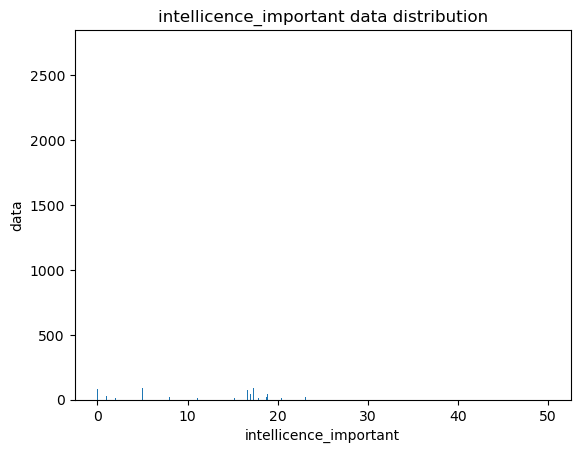

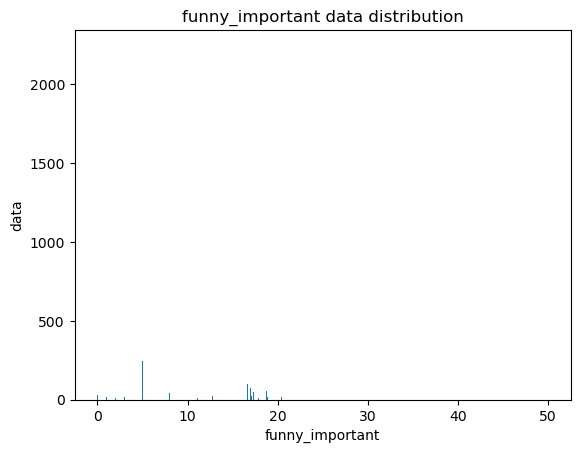

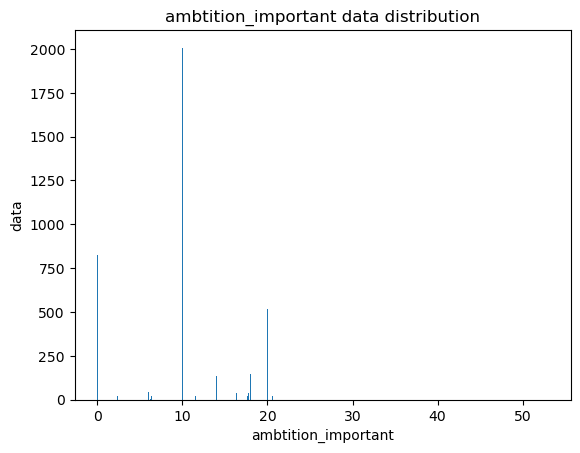

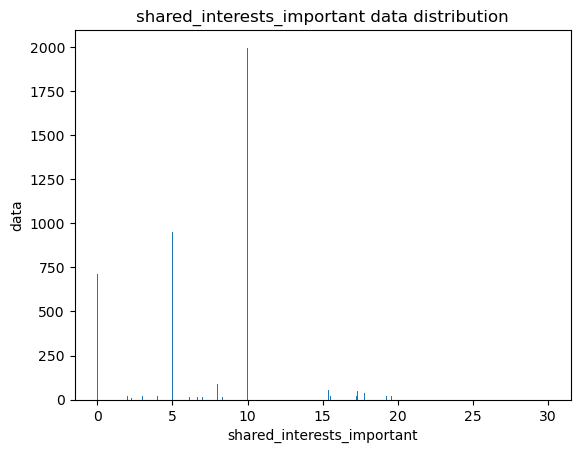

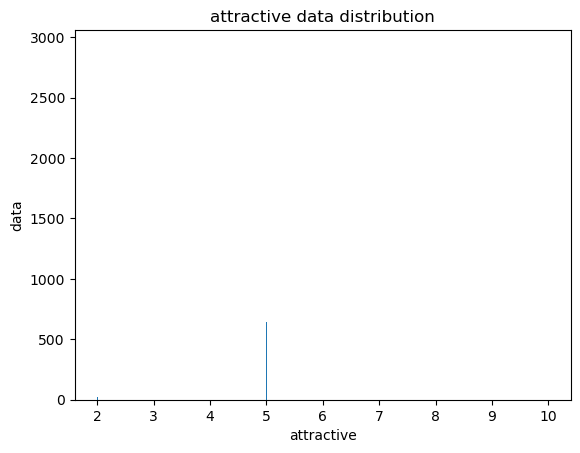

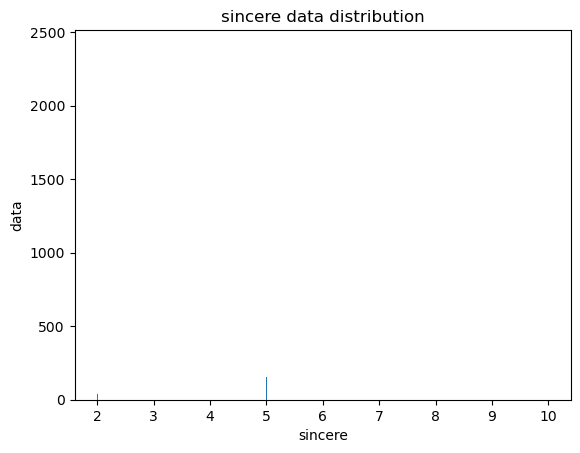

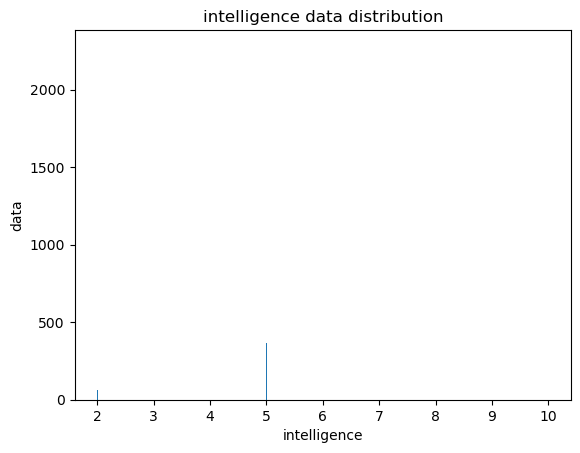

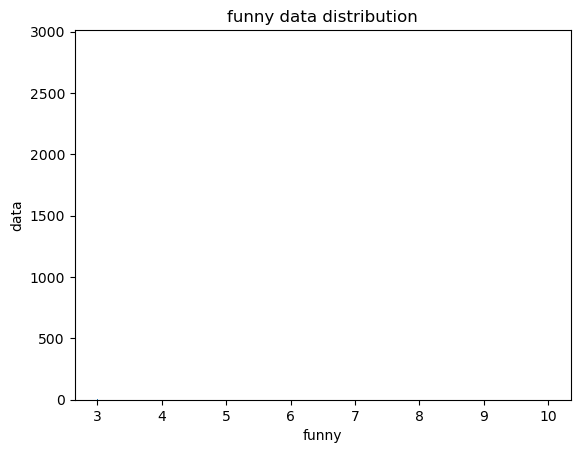

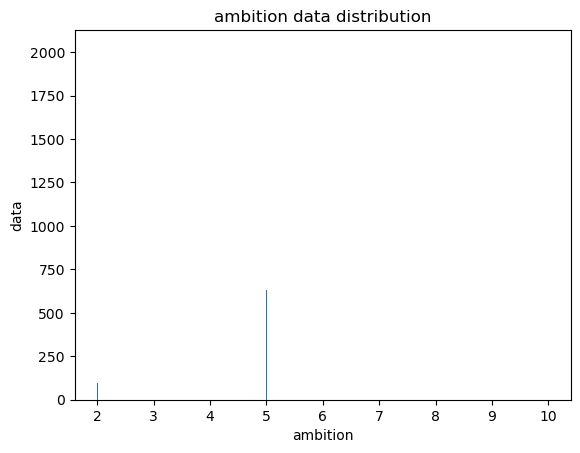

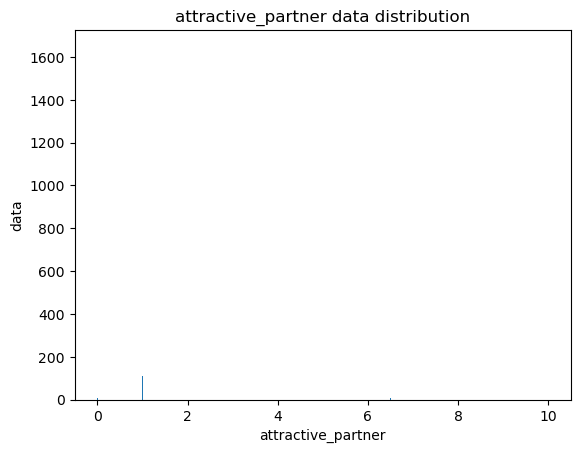

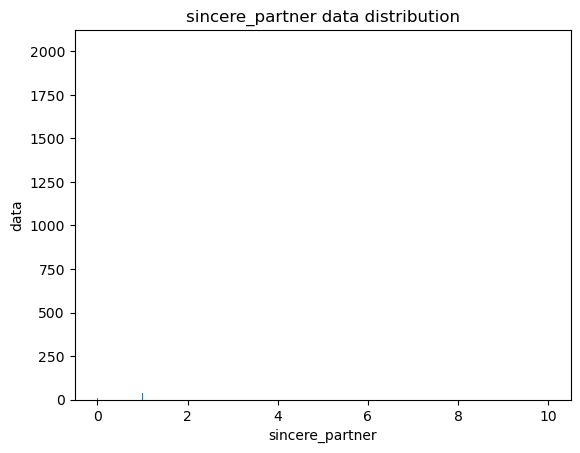

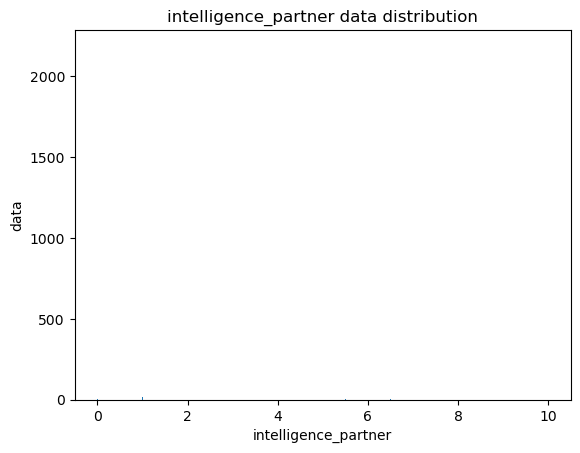

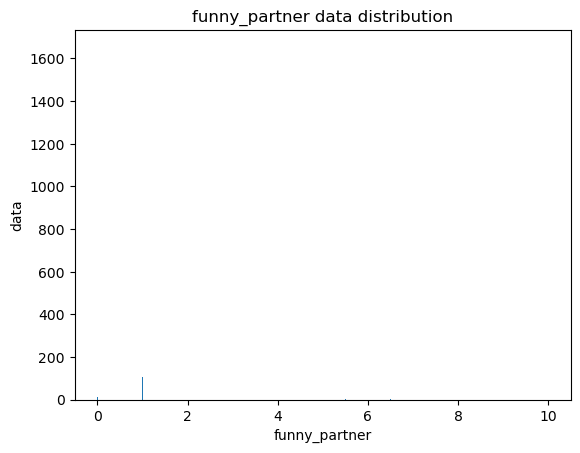

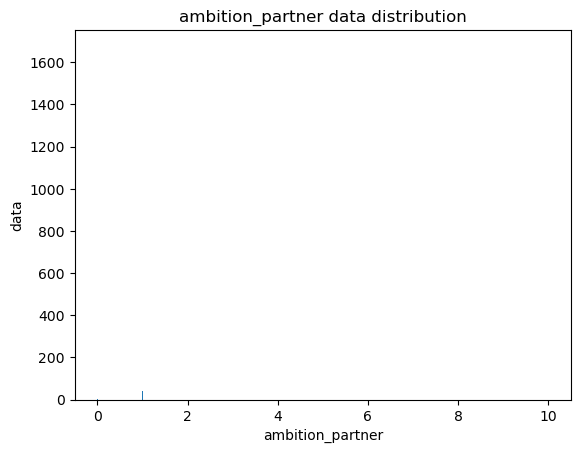

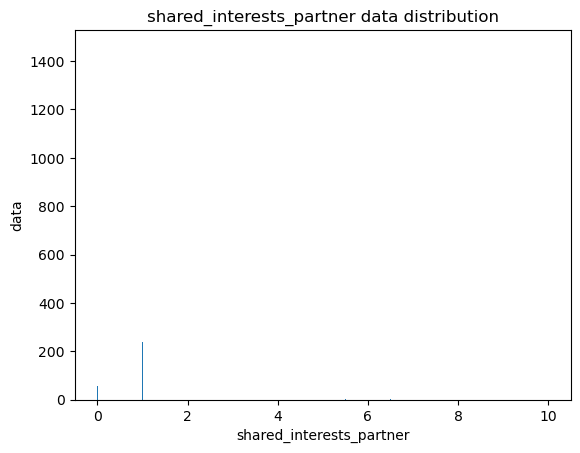

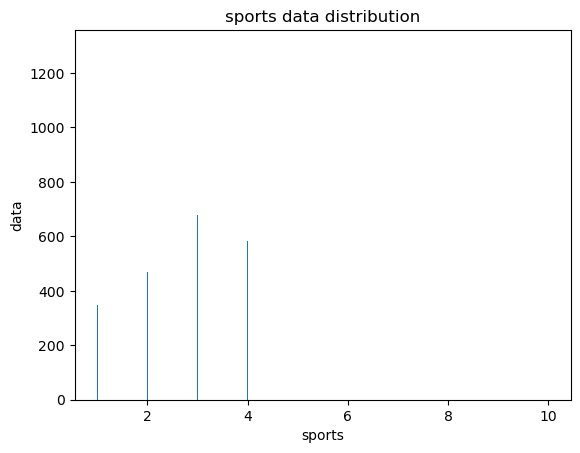

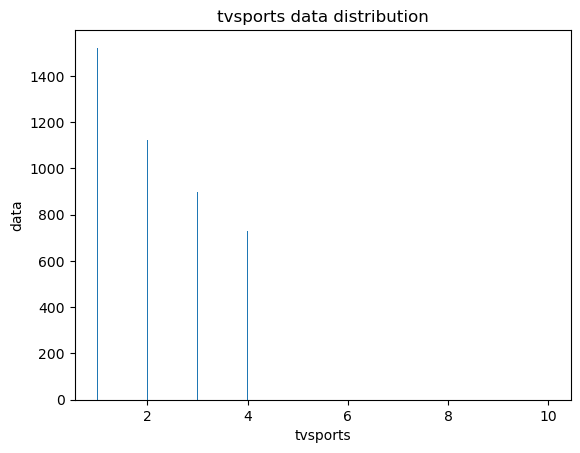

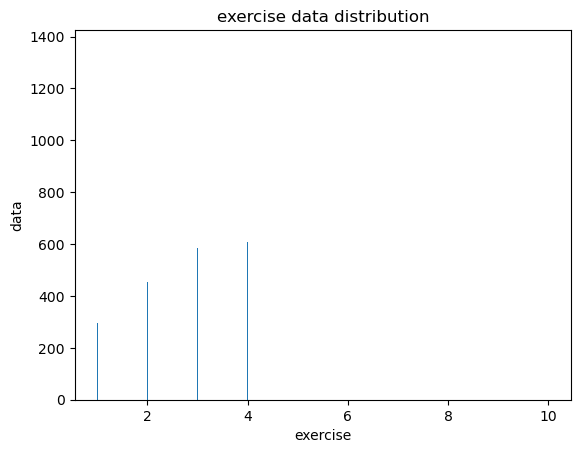

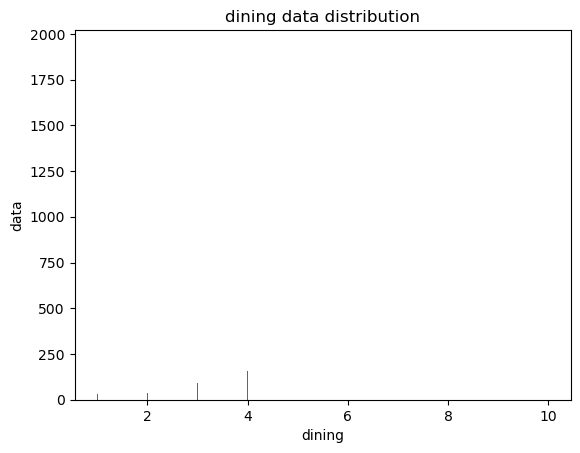

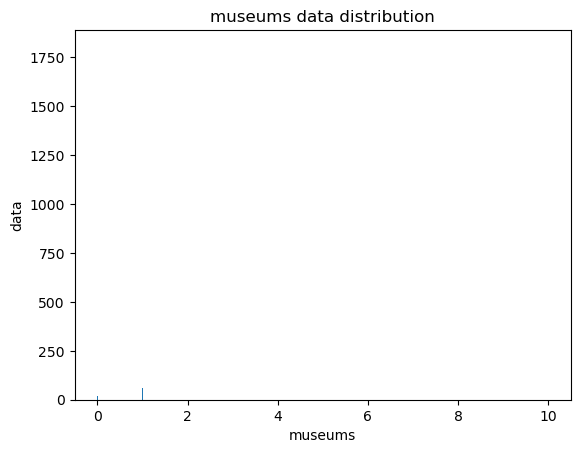

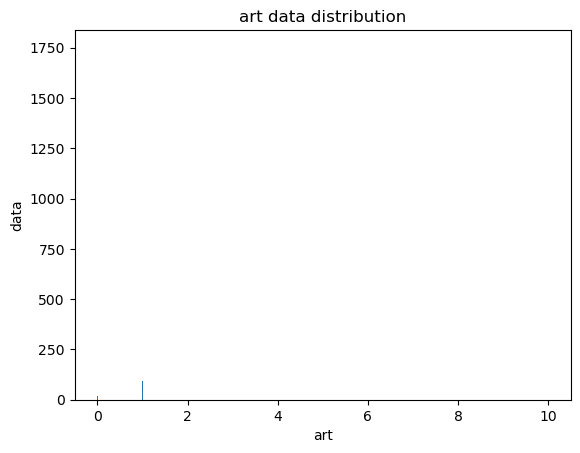

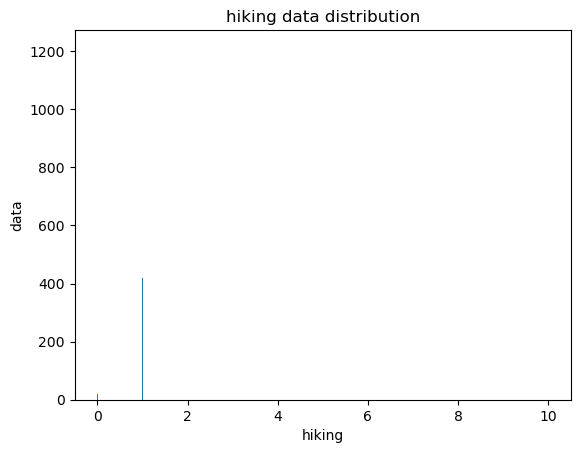

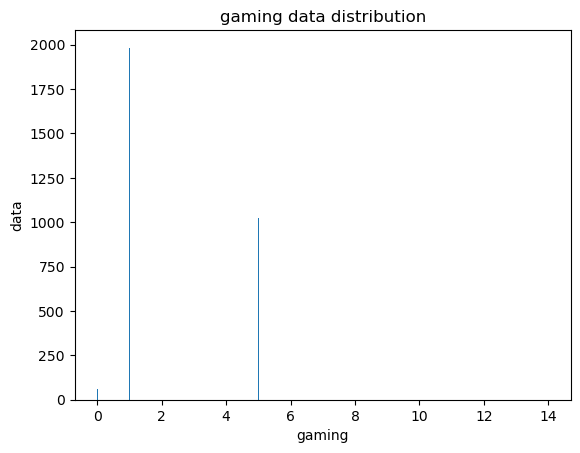

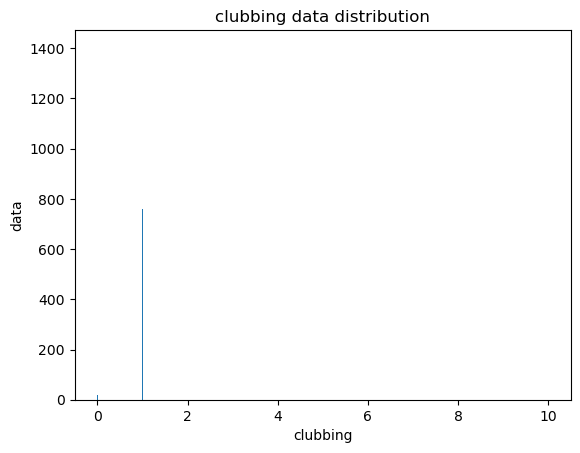

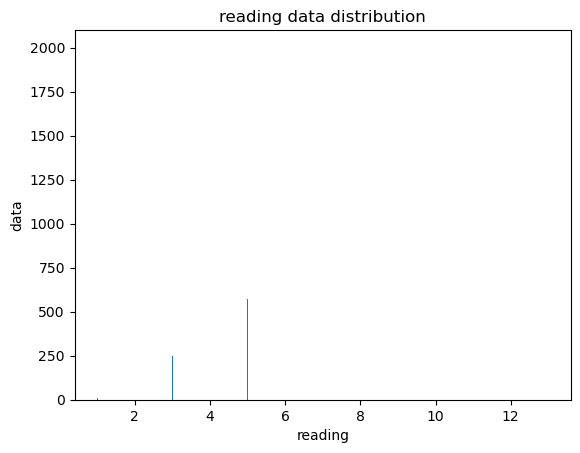

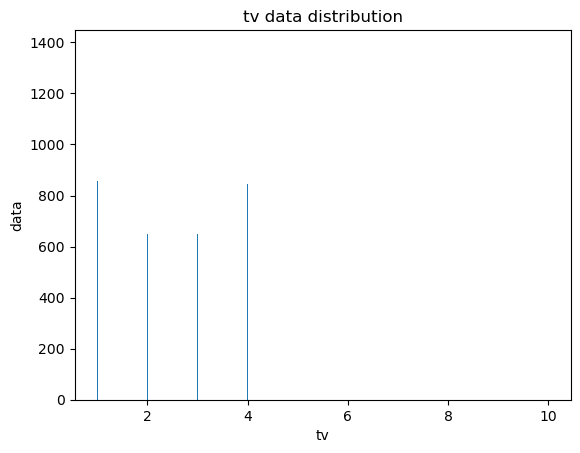

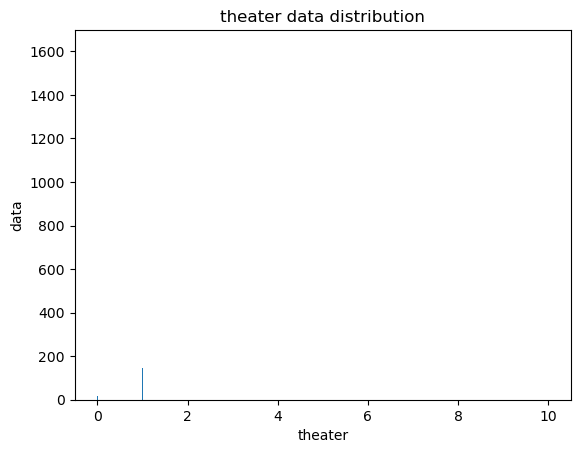

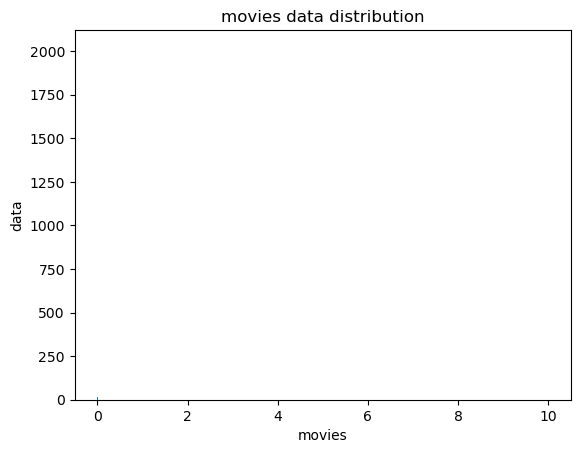

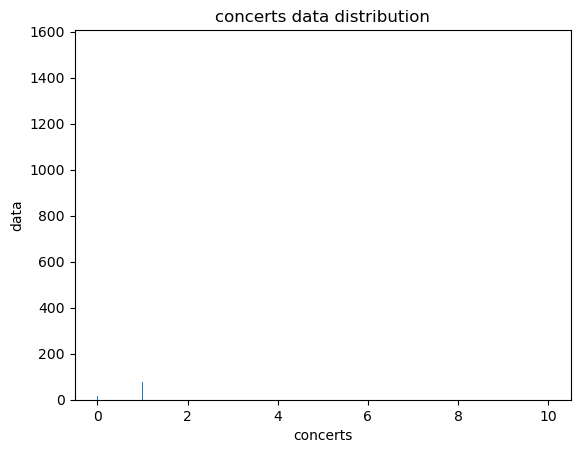

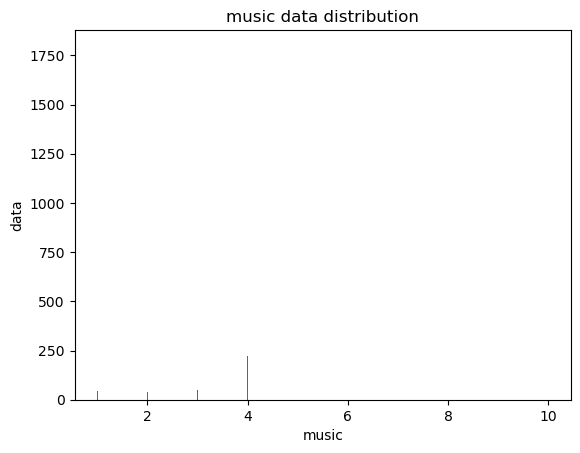

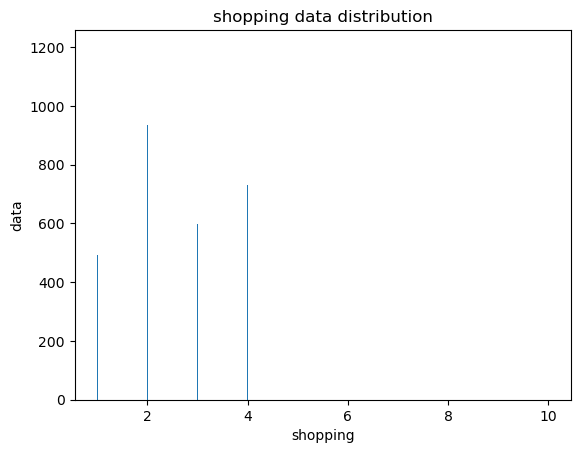

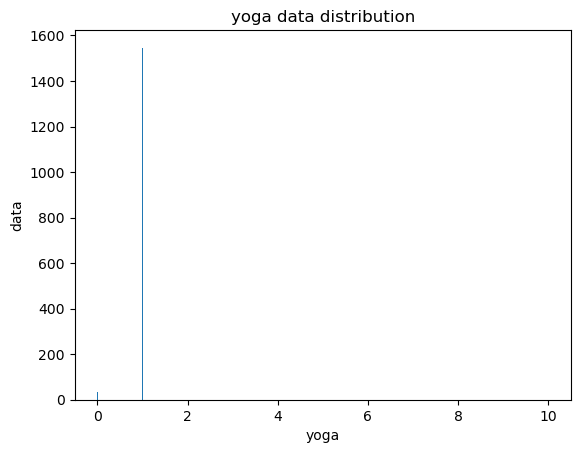

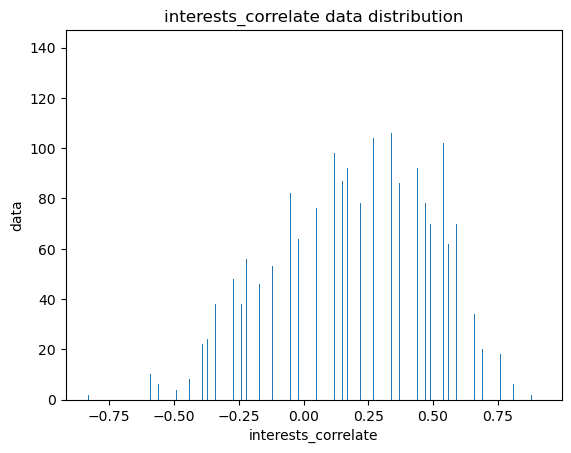

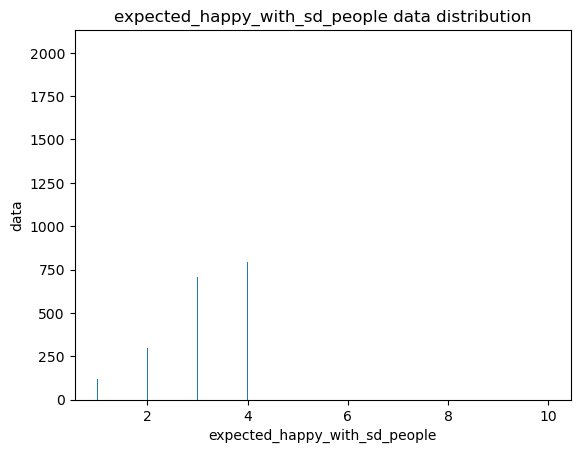

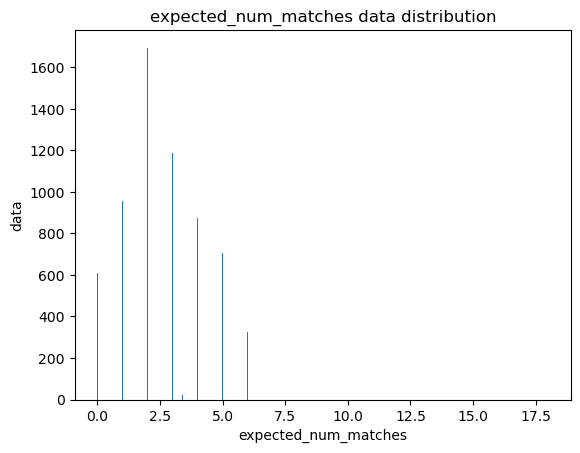

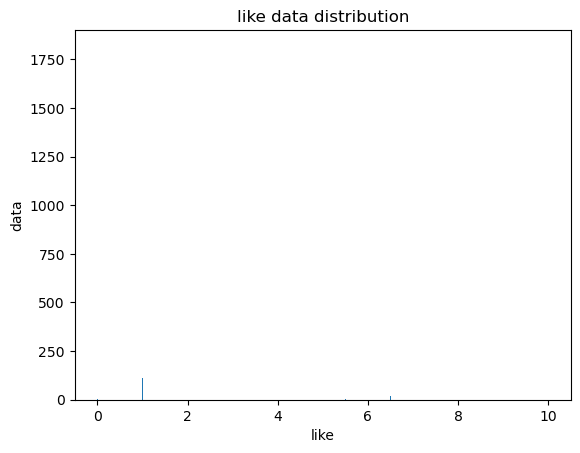

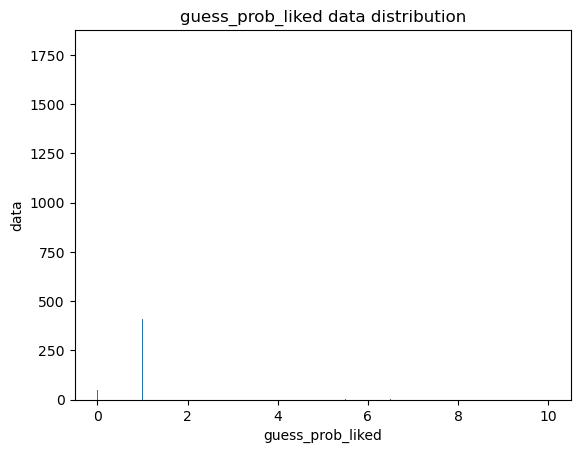

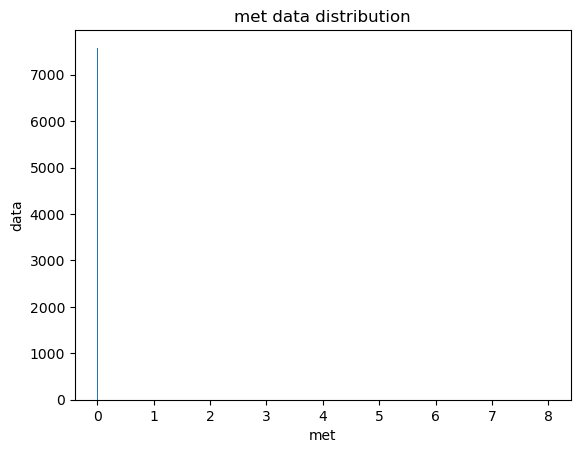

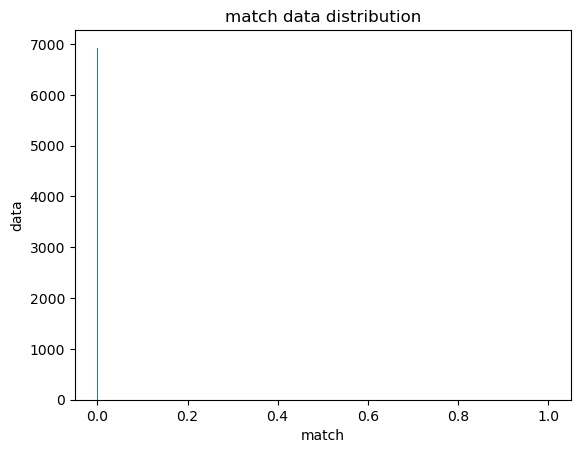

In [38]:
#Univariate analysis: Examine individual variables (distributions, frequency).
for x in numeric_df:
    plt.hist(Eda_data[x], 2000)
    plt.xlabel(x)
    plt.ylabel("data")
    plt.title(f"{x} data distribution")

    plt.show()
    # what i am noticing is that a lot ____ _____ _o data is not their maybe we should limit the ml to will a person match with the other person

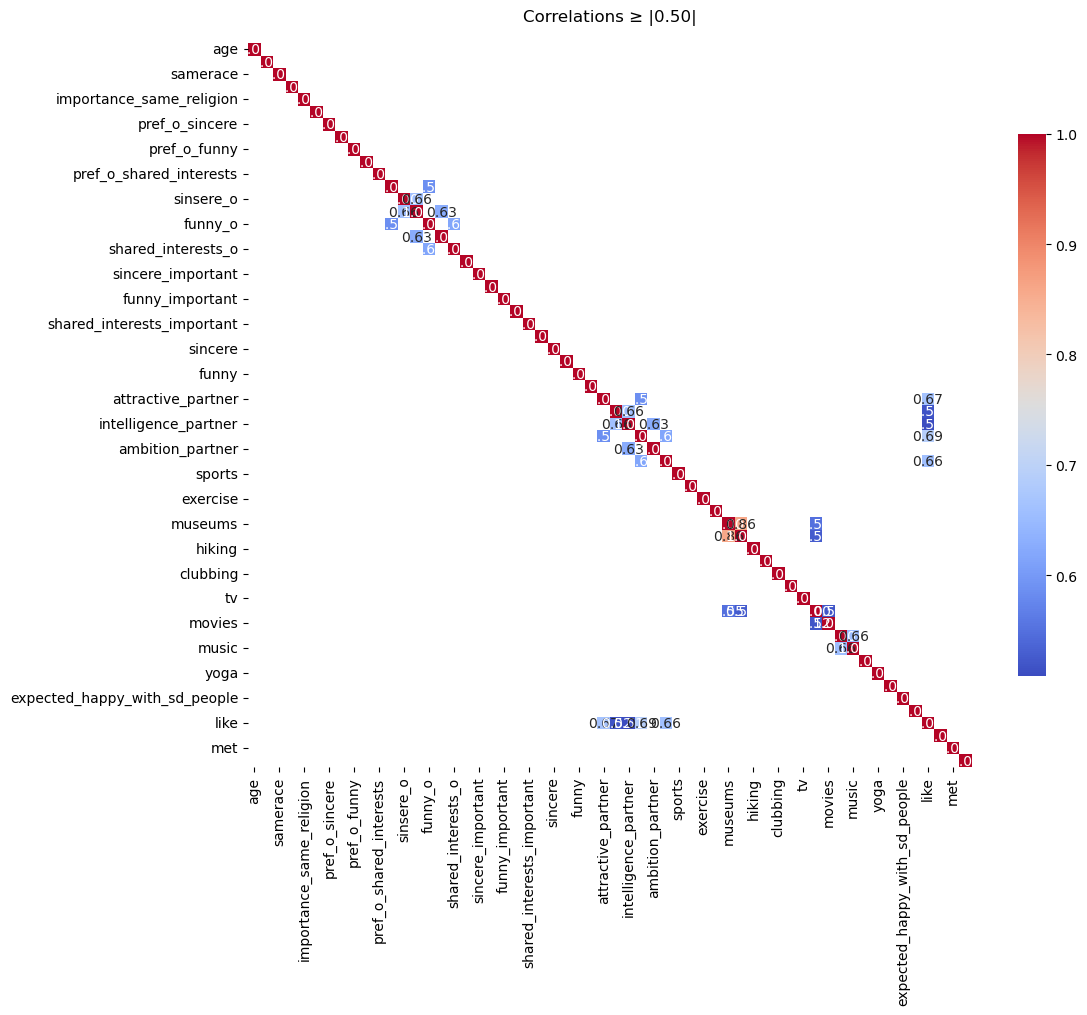

In [39]:
# compute full corr matrix
corr = numeric_df.corr()

# build a mask: True where we want to hide
mask = corr.abs() < 0.50

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    mask=mask,           # hide low-corr cells
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .75},
)
plt.title("Correlations ≥ |0.50|", pad=16)
plt.tight_layout()
plt.show()


                                    age     age_o  samerace  \
age                            1.000000  0.100686  0.006853   
age_o                          0.100686  1.000000  0.007819   
samerace                       0.006853  0.007819  1.000000   
importance_same_race          -0.147053 -0.003368  0.090571   
importance_same_religion      -0.054815  0.031781  0.070872   
pref_o_attractive             -0.073956  0.033145  0.022139   
pref_o_sincere                 0.028075  0.026206 -0.052700   
pref_o_intelligence           -0.010210  0.044072  0.020288   
pref_o_funny                  -0.024664 -0.086265  0.035083   
pref_o_ambitious               0.076990 -0.090577 -0.027192   
pref_o_shared_interests        0.050930  0.014560 -0.014865   
attractive_o                  -0.051284  0.037079  0.051511   
sinsere_o                      0.006322  0.013146  0.012946   
intelligence_o                 0.028872  0.014073  0.017557   
funny_o                       -0.042193  0.001316  0.01

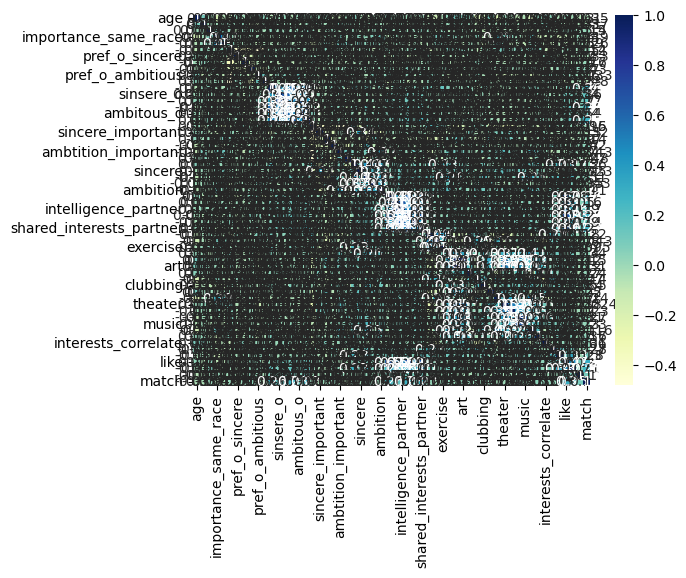

In [55]:
# Compute correlation matrix
co_mtx = numeric_df.corr(numeric_only=True)

# Print correlation matrix
print(co_mtx)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

In [43]:
# lets find the p value 
from scipy.stats import ttest_ind

def get_significant_numeric_features(df, target_col='match', alpha=0.05):
    numeric_df = df.select_dtypes(include='number').drop(columns=[target_col], errors='ignore')
    significant_features = {}

    for col in numeric_df.columns:
        group1 = df[df[target_col] == 1][col].dropna()
        group0 = df[df[target_col] == 0][col].dropna()

        if len(group1) > 0 and len(group0) > 0:
            stat, pval = ttest_ind(group1, group0, equal_var=False)
            if pval < alpha:
                significant_features[col] = round(pval, 6)

    return pd.Series(significant_features).sort_values()

# Example usage:
significant_features = get_significant_numeric_features(numeric_df, target_col='match', alpha=0.05)
print("Statistically significant numeric features:")
print(significant_features)

Statistically significant numeric features:
sincere_partner                  0.000000
like                             0.000000
expected_num_matches             0.000000
shared_interests_partner         0.000000
ambition_partner                 0.000000
funny_partner                    0.000000
intelligence_partner             0.000000
guess_prob_liked                 0.000000
attractive_partner               0.000000
shared_interests_o               0.000000
ambitous_o                       0.000000
met                              0.000000
intelligence_o                   0.000000
sinsere_o                        0.000000
attractive_o                     0.000000
funny_o                          0.000000
intelligence                     0.000001
clubbing                         0.000001
importance_same_race             0.000005
shared_interests_important       0.000014
pref_o_shared_interests          0.000014
pref_o_funny                     0.000183
funny_important                 

In [44]:
#P value was no help so lets find cohen d for the numerical columns 


def cohens_d(group1, group0):
    """Calculate Cohen's d for effect size"""
    n1, n2 = len(group1), len(group0)
    s1, s2 = group1.std(), group0.std()
    s_pooled = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))
    return (group1.mean() - group0.mean()) / s_pooled

def get_strong_features(df, target_col='match', alpha=0.05, min_effect=0.3):
    numeric_df = df.select_dtypes(include='number').drop(columns=[target_col], errors='ignore')
    results = []

    for col in numeric_df.columns:
        group1 = df[df[target_col] == 1][col].dropna()
        group0 = df[df[target_col] == 0][col].dropna()
        if len(group1) > 0 and len(group0) > 0:
            stat, pval = ttest_ind(group1, group0, equal_var=False)
            d = cohens_d(group1, group0)
            if pval < alpha and abs(d) >= min_effect:
                results.append((col, round(pval, 6), round(d, 3)))

    return pd.DataFrame(results, columns=['Feature', 'p-value', "Cohen's d"]).sort_values('p-value')

# Example:
strong_features = get_strong_features(numeric_df, target_col='match')
print(strong_features)


                     Feature  p-value  Cohen's d
0               attractive_o      0.0      0.720
1                  sinsere_o      0.0      0.444
2             intelligence_o      0.0      0.457
3                    funny_o      0.0      0.766
4                 ambitous_o      0.0      0.374
5         shared_interests_o      0.0      0.741
6         attractive_partner      0.0      0.715
7            sincere_partner      0.0      0.443
8       intelligence_partner      0.0      0.456
9              funny_partner      0.0      0.767
10          ambition_partner      0.0      0.373
11  shared_interests_partner      0.0      0.736
12      expected_num_matches      0.0      0.360
13                      like      0.0      0.852
14          guess_prob_liked      0.0      0.703


In [48]:
# for write up
🧠 Feature Selection for Predicting Matches
🎯 Objective
We aim to identify the most predictive features for determining whether a participant matched with their date. Rather than relying solely on correlation, we used:

P-values to assess statistical significance (via t-tests)

Cohen’s d to assess practical significance (effect size)

This ensures we only include features that are both meaningful and predictive.

✅ Selected Features
We selected features with:

p-value < 0.05

Cohen’s d ≥ 0.3

Here are the top predictors:

Feature	Cohen’s d	Interpretation
like	0.852	         Participants who reported liking their date were far more likely to match.
funny_partner	0.767	Believing the partner was funny strongly predicted matching.
funny_o	0.766	         The partner's perception of the participant as funny was a strong predictor — participants who were seen as funny matched more.
shared_interests_o	0.741	The partner's belief that they had shared interests with the participant significantly increased matching.
shared_interests_partner	0.736	When the participant thought their partner valued shared interests, match likelihood increased.
attractive_o	0.720	Being rated as attractive by the partner was highly predictive of matches.
attractive_partner	0.715	So was perceiving the partner as attractive.
guess_prob_liked	0.703	Participants who guessed their date liked them were more likely to match.

Additional notable predictors include:

Partner ratings of the participant's intelligence, sincerity, and ambition (intelligence_o, sinsere_o, ambitous_o)

Participant perceptions of their partner’s sincerity, ambition, and overall expectations (sincere_partner, ambition_partner, expected_num_matches)

🔍 What These Features Reveal About Matches
Partner Perception Is Crucial
Many top features (e.g., funny_o, attractive_o, shared_interests_o) reflect how the partner saw the participant. This shows that being perceived positively (rather than just feeling good about the date) is strongly linked to matching.

Mutual Perception Drives Connection
Features like like, guess_prob_liked, and attractive_partner show that mutual awareness and chemistry are key to match formation. If you liked your date, thought they liked you, and found them attractive — you probably matched.

Shared Values Matter
Shared interests and perceived personality traits (like humor and sincerity) matter significantly — but especially when these values are recognized and reciprocated.

📦 Conclusion
Our model will focus on:

Partner perception (how you are seen)

Self-perception (how you see your partner)

Mutual chemistry and values

This paints a powerful behavioral picture: successful matches are driven by being seen as attractive, funny, and aligned in values — and knowing the other person feels the same way.

These insights can guide everything from dating app algorithm design to AI companionship modeling and real-world social coaching systems.")

SyntaxError: invalid character '🧠' (U+1F9E0) (690185723.py, line 2)

In [50]:
final_data = numeric_df[[
    'like', 'funny_partner', 'funny_o', 'shared_interests_o',
    'shared_interests_partner', 'attractive_o', 'attractive_partner',
    'guess_prob_liked', 'intelligence_o', 'sinsere_o', 'sincere_partner',
    'ambitous_o', 'ambition_partner', 'expected_num_matches', 'match'
]]

In [53]:
final_data.shape

(8293, 15)

In [54]:
final_data.to_csv("final_data.csv", index=False)
